In [29]:
import os

os.chdir(r"C:\Users\i-ryb\Desktop\fire_forecast_kurgan")
os.getcwd()

'C:\\Users\\i-ryb\\Desktop\\fire_forecast_kurgan'

D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<Axes: >

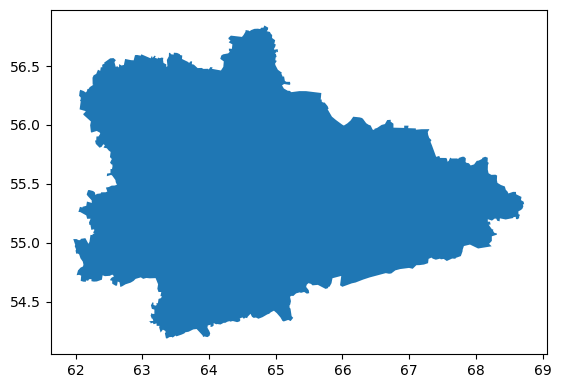

In [2]:
import geopandas as gpd

region = gpd.read_file(
    r"C:\Users\i-ryb\Desktop\fire_forecast_kurgan\data_raw\boundaries\kurgan.geojson"
)
region.plot()

In [8]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [3]:
region.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

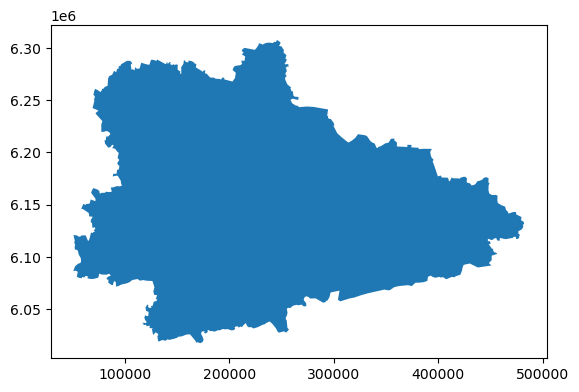

In [4]:
region_m = region.to_crs(epsg=32642)
region_m.plot()

In [22]:
from src.grid import build_grid

# region_m — это перепроецированная область (EPSG:32642)
grid = build_grid(region_m, cell_size=500)

grid.head()


,name,cartodb_id,created_at,updated_at,name_latin,geometry,cell_id
0,?????????? ???????,1,2013-12-04 04:23:51+01:00,2013-12-04 04:30:50+01:00,Kurgan Oblast,"POLYGON ((51115.478 6086779.248, 51115.478 608...",0
1,?????????? ???????,1,2013-12-04 04:23:51+01:00,2013-12-04 04:30:50+01:00,Kurgan Oblast,"POLYGON ((51115.478 6087279.248, 51115.478 608...",1
2,?????????? ???????,1,2013-12-04 04:23:51+01:00,2013-12-04 04:30:50+01:00,Kurgan Oblast,"POLYGON ((51115.478 6087279.248, 50940.121 608...",2
3,?????????? ???????,1,2013-12-04 04:23:51+01:00,2013-12-04 04:30:50+01:00,Kurgan Oblast,"POLYGON ((51115.478 6119779.248, 51115.478 611...",3
4,?????????? ???????,1,2013-12-04 04:23:51+01:00,2013-12-04 04:30:50+01:00,Kurgan Oblast,"POLYGON ((51115.478 6120279.248, 51115.478 611...",4


<Axes: >

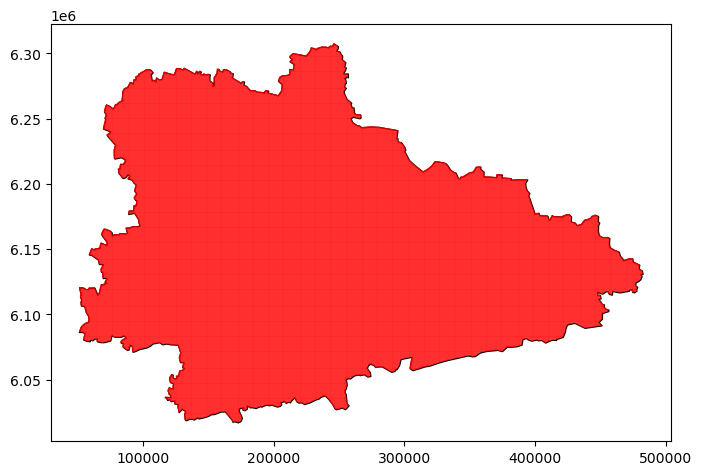

In [24]:
ax = region_m.plot(color="white", edgecolor="black", figsize=(8, 8))
grid.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=0.2)


In [31]:
grid.to_file(
    "data_interim/grids/grid_500m_kurgan.geojson",
    driver="GeoJSON"
)


In [27]:
import os
os.getcwd()

'C:\\Users\\i-ryb\\Desktop\\fire_forecast_kurgan\\notebooks'

In [32]:
import pandas as pd

fires_snp = pd.read_csv("data_raw/fires_viirs/VIIRS_S_NPP.csv")
fires_noaa = pd.read_csv("data_raw/fires_viirs/VIIRS_NOAA20.csv")

In [34]:
fires_all = pd.concat([fires_snp, fires_noaa], ignore_index=True)